In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Load the Iris dataset
iris_data = pd.read_csv('iris.csv')

In [46]:
# Understanding the dataset
print("Dataset Information:\n")
print(iris_data.info())

print("\nClass Distribution:")
print(iris_data['Species'].value_counts())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Class Distribution:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [47]:
print("\n\nDataset Summary Statistics:")
print(iris_data.describe())



Dataset Summary Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [48]:
#Preprocessing the dataset - Converting categorical values of Species to numerical values
iris_data['Species'] = iris_data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [49]:
#Removing the Id column
iris_data.drop('Id', axis=1, inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
#Checking for null/missing values
print("\n\nChecking for null values:\n")
print(iris_data.isnull().sum())



Checking for null values:

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [51]:
# Separate the features and target variable
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [54]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [55]:
# Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [56]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


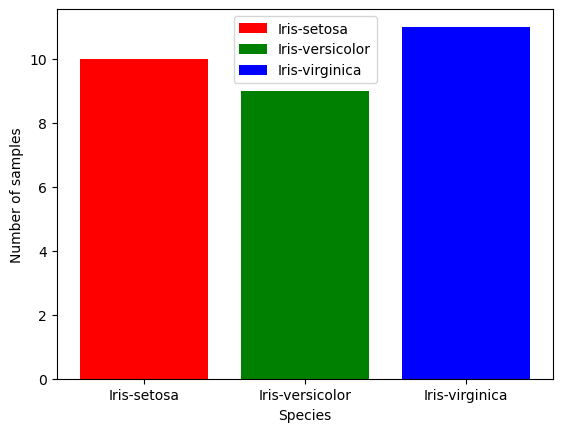

In [57]:
#plotting the bar graph
import matplotlib.pyplot as plt
plt.bar(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], matrix[0], color='r', label='Iris-setosa')
plt.bar(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], matrix[1], color='g', label='Iris-versicolor')
plt.bar(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], matrix[2], color='b', label='Iris-virginica')
plt.xlabel('Species')
plt.ylabel('Number of samples')
plt.legend()
plt.show()


In [58]:
#saving the model
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))

In [64]:
# Calculate the distribution of classes
class_distribution = iris_data['Species'].value_counts(normalize=True)

print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64


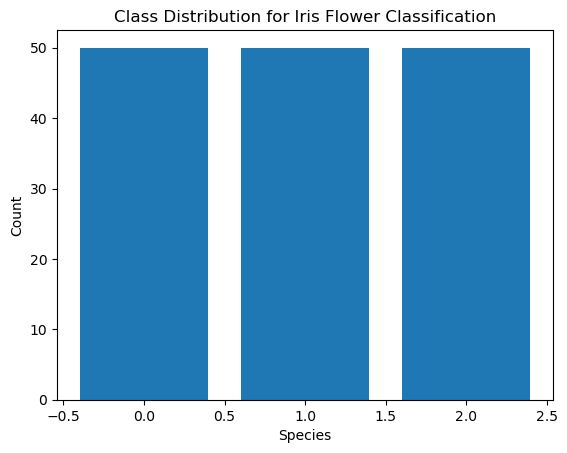

In [70]:
# Plotting the distribution
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution for Iris Flower Classification')
plt.show()

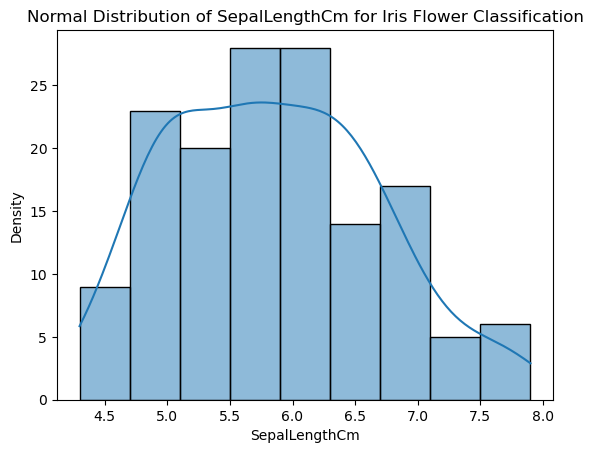

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the feature for which you want to find the normal distribution
feature = 'SepalLengthCm'

# Extract the data for the selected feature and the corresponding species
feature_data = iris_data[feature]
species = iris_data['Species']

# Plot the normal distribution using seaborn
sns.histplot(data=feature_data, kde=True)
plt.xlabel(feature)
plt.ylabel('Density')
plt.title('Normal Distribution of {} for Iris Flower Classification'.format(feature))
plt.show()


In [74]:
# Select the features for which you want to calculate the summary
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Calculate the quartiles and five-number summary for each feature
summary = iris_data[features].describe().transpose()

# Print the quartiles and five-number summary
print(summary)


               count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


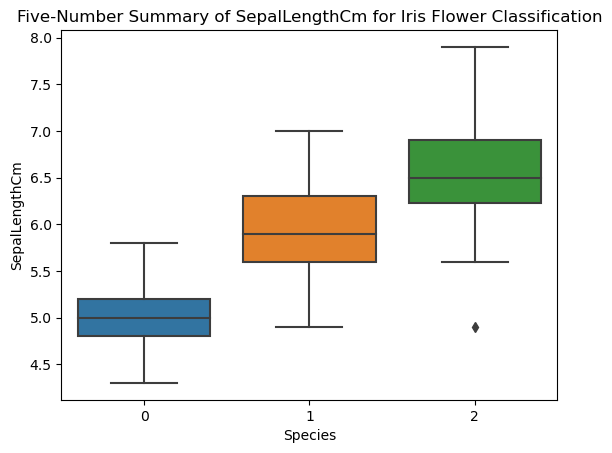

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the feature for which you want to calculate the five-number summary
feature = 'SepalLengthCm'

# Extract the data for the selected feature and the corresponding species
feature_data = iris_data[feature]
species = iris_data['Species']

# Calculate the five-number summary using describe()
summary = feature_data.describe()

# Print the five-number summary
print(summary)

# Plotting the five-number summary visually
sns.boxplot(y=feature_data, x=species)
plt.xlabel('Species')
plt.ylabel(feature)
plt.title('Five-Number Summary of {} for Iris Flower Classification'.format(feature))
plt.show()


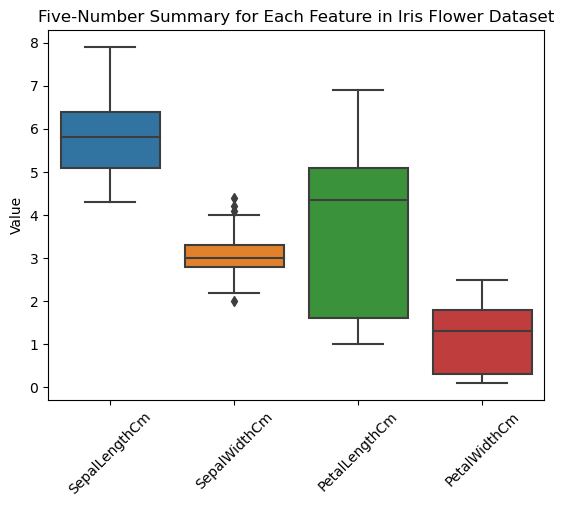

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset

# Select the features for which you want to calculate the summary
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plotting the five-number summary for each feature
sns.boxplot(data=iris_data[features])
plt.ylabel('Value')
plt.title('Five-Number Summary for Each Feature in Iris Flower Dataset')
plt.xticks(rotation=45)
plt.show()


In [81]:
#Taking the input form the user and making the prediction
sepal_length = float(input("Enter sepal length (4.3 - 7.9) (cm): "))
sepal_width = float(input("Enter sepal width (2.0 - 4.4) (cm): "))
petal_length = float(input("Enter petal length (1.0 - 6.9) (cm): "))
petal_width = float(input("Enter petal width (0.1 - 2.5) (cm): "))
input_data = [[sepal_length, sepal_width, petal_length, petal_width]]

#loading the model and testing it
model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict([input_data[0]])
if prediction == 0:
    prediction = 'Iris-setosa'
elif prediction == 1:
    prediction = 'Iris-versicolor'
else:
    prediction = 'Iris-virginica'
print("Prediction:", prediction)

Prediction: Iris-virginica


c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
